QUESTION 1

TASK 1:

In [35]:
# practice 1.0. define features of two data points
import numpy as np
instance_1 = np.array([2,1])
instance_2 = np.array([4,3])

In [36]:
# practice 1.1. Euclidean distance
from scipy.spatial import distance
dist1_function = distance.euclidean
dist1_function(instance_1, instance_2)

2.8284271247461903

In [37]:
# practice 1.2. Minkowski distance (p=1, manhattan)
from scipy.spatial import distance
dist2_function = distance.minkowski
dist2_function(instance_1, instance_2, p=1)

4.0

In [38]:
# practice 1.3. Minkowski distance (p=2, Euclidean distance)
from scipy.spatial import distance
dist3_function = distance.minkowski
dist3_function(instance_1, instance_2, p=2)

2.8284271247461903

In [39]:
# practice 1.4. cosine distance
from scipy.spatial import distance
dist4_function = distance.cosine
dist4_function(instance_1, instance_2)


0.01613008990009257

TASK 2:

In [40]:
from sklearn.metrics import DistanceMetric

# Define features of two data points
instance_3 = np.array([1, 2, 3])
instance_4 = np.array([4, 5, 6])

# Chebyshev distance
chebyshev = DistanceMetric.get_metric('chebyshev')
dist5 = chebyshev.pairwise([instance_3], [instance_4])[0][0]

# Hamming distance
hamming = DistanceMetric.get_metric('hamming')
dist6 = hamming.pairwise([instance_3], [instance_4])[0][0]

dist5, dist6

(3.0, 1.0)

In [41]:
# practice 1.5. define features of two data points
import numpy as np
instance_1 = np.array([2,1])
instance_2 = np.array([4,3])

In [42]:
# practice 1.6. Euclidean distance
from sklearn.metrics import DistanceMetric
dist1_function = DistanceMetric.get_metric('euclidean')
dist1_function.pairwise([instance_1, instance_2]) # accept 2D array

array([[0.        , 2.82842712],
       [2.82842712, 0.        ]])

In [43]:
# practice 1.7. Minkowski distance (p=1, manhattan)
from sklearn.metrics import DistanceMetric
dist2_function = DistanceMetric.get_metric('minkowski', p = 1)
dist2_function.pairwise([instance_1, instance_2]) # accept 2D array

array([[0., 4.],
       [4., 0.]])

In [44]:
# practice 1.8. Minkowski distance (p=2, Euclidean distance)
from sklearn.metrics import DistanceMetric
dist3_function = DistanceMetric.get_metric('minkowski', p = 2)
dist3_function.pairwise([instance_1, instance_2]) # accept 2D array

array([[0.        , 2.82842712],
       [2.82842712, 0.        ]])

In [45]:
# practice 1.9. cosine distance
import sklearn
sklearn.metrics.pairwise.cosine_distances([instance_1, instance_2]) # accept 2D array

array([[0.        , 0.01613009],
       [0.01613009, 0.        ]])

QUESTION 2

In [46]:

# practice 2.1: flatten each 2d mnist image into 1d array
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from tensorflow.keras.datasets import mnist  # Import MNIST dataset

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

width, height = x_train.shape[1], x_train.shape[2]
x_train_flatten = x_train.reshape(x_train.shape[0], width*height)
print("x_train_flatten.shape: ",x_train_flatten.shape)

x_test_flatten = x_test.reshape(x_test.shape[0], width*height)
print("x_test_flatten.shape: ",x_test_flatten.shape)

x_train_flatten.shape:  (60000, 784)
x_test_flatten.shape:  (10000, 784)


In [47]:
# practice 2.2: define the binary labels, label 1 represents the digit 5 found in image, otherwise, label 0.
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [48]:
# practice 2.3: apply cross-validation on the training set
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

## practice 2.4: define one KNN model
KNN_classifier = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean')

In [49]:
## practice 2.5: call cross-val_score
# KNN will take ~3min on MNIST set using 3-fold cross-validation
CV_scores = cross_val_score(estimator = KNN_classifier, X = x_train_flatten, y = y_train_5, cv = 3, scoring = 'accuracy')
print("CV_scores: ", CV_scores)

CV_scores:  [0.99415 0.9922  0.9926 ]


TASK 1:

In [50]:
# Experiment with n_neighbors=3
KNN_classifier_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
CV_scores_3 = cross_val_score(estimator=KNN_classifier_3, X=x_train_flatten, y=y_train_5, cv=3, scoring='accuracy')
print("CV_scores with n_neighbors=3, cv=3: ", CV_scores_3)

# Experiment with n_neighbors=11
KNN_classifier_11 = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
CV_scores_11 = cross_val_score(estimator=KNN_classifier_11, X=x_train_flatten, y=y_train_5, cv=3, scoring='accuracy')
print("CV_scores with n_neighbors=11, cv=3: ", CV_scores_11)

# Increase the number of K-folds to 5
CV_scores_5 = cross_val_score(estimator=KNN_classifier, X=x_train_flatten, y=y_train_5, cv=5, scoring='accuracy')
print("CV_scores with n_neighbors=7, cv=5: ", CV_scores_5)

# Increase the number of K-folds to 10
CV_scores_10 = cross_val_score(estimator=KNN_classifier, X=x_train_flatten, y=y_train_5, cv=10, scoring='accuracy')
print("CV_scores with n_neighbors=7, cv=10: ", CV_scores_10)

CV_scores with n_neighbors=3, cv=3:  [0.9941  0.99275 0.992  ]
CV_scores with n_neighbors=11, cv=3:  [0.9932 0.9916 0.9923]
CV_scores with n_neighbors=7, cv=5:  [0.99475    0.99433333 0.992      0.993      0.99258333]
CV_scores with n_neighbors=7, cv=10:  [0.995      0.99516667 0.99366667 0.995      0.9925     0.99183333
 0.99233333 0.9935     0.99266667 0.993     ]


TASK 2:

In [51]:
# display CV scores
def display_scores(scores):
    print("CV_scores: ", scores)
    print("CV Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [52]:
display_scores(CV_scores)

CV_scores:  [0.99415 0.9922  0.9926 ]
CV Mean:  0.9929833333333332
Standard deviation:  0.0008409650541028508


TASK 3:

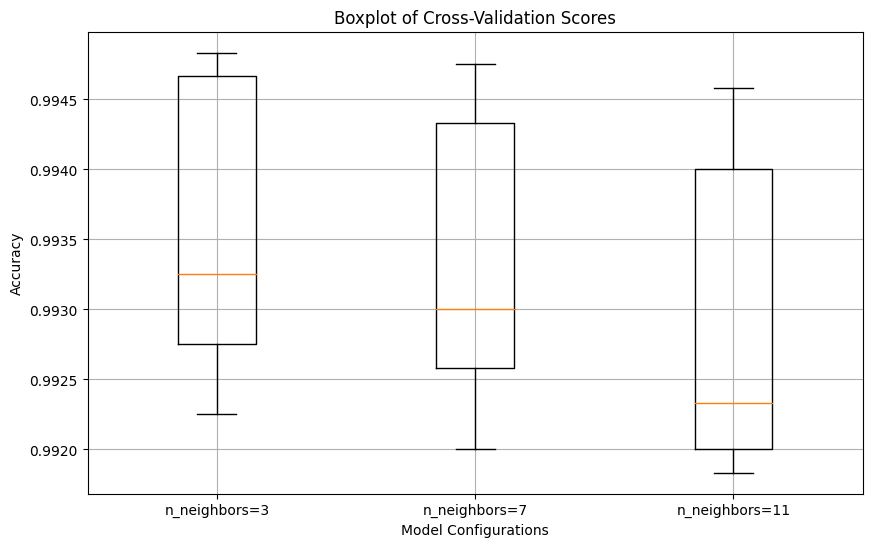

In [53]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming x_train and y_train are already defined and preprocessed MNIST dataset
# Flattening the 2D MNIST images into 1D arrays
width, height = x_train.shape[1], x_train.shape[2]
x_train_flatten = x_train.reshape(x_train.shape[0], width * height)
x_test_flatten = x_test.reshape(x_test.shape[0], width * height)

# Define the binary labels for digit 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Define the KNN models with different n_neighbors
knn_models = {
    'n_neighbors=3': KNeighborsClassifier(n_neighbors=3, metric='euclidean'),
    'n_neighbors=7': KNeighborsClassifier(n_neighbors=7, metric='euclidean'),
    'n_neighbors=11': KNeighborsClassifier(n_neighbors=11, metric='euclidean')
}

# Perform cross-validation for different configurations
cv_scores = {}

for label, model in knn_models.items():
    scores = cross_val_score(estimator=model, X=x_train_flatten, y=y_train_5, cv=5, scoring='accuracy')
    cv_scores[label] = scores

# Plotting the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores.values(), labels=cv_scores.keys())
plt.title('Boxplot of Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xlabel('Model Configurations')
plt.grid(True)
plt.show()


QUESTION 3

In [54]:
# practice 3.1: define a ML model to finetune the parameters
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier()
# leave the parameters empty inside the method classs

In [57]:
# save parameters in dictionary
param_grid = {
    'param1': [3,7,8],
    'param2': ['euclidean', 'minkowski', 'cosine'],

}

In [55]:
# parameter 1: n_neighbors
n_neighbors_list = [1, 3, 5, 7]

In [56]:
# parameter 2: distance metrics
from scipy.spatial import distance
metrics_list = [distance.euclidean, distance.minkowski, distance.cosine]

In [58]:
# define the parameter combination
KNN_param_grid = {
'n_neighbors': n_neighbors_list,
'metric': metrics_list
}

In [59]:
# define grid_search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = KNN_classifier, param_grid = KNN_param_grid, cv = 5, scoring = 'accuracy', return_train_score = True)

In [62]:
# parameter 1: n_neighbors
n_neighbors_list = [1,2]

# parameter 2: distance metrics
from scipy.spatial import distance
metrics_list = [distance.euclidean]

In [61]:
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist
from scipy.spatial import distance

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Use a smaller subset for quicker computations
x_train_small = x_train[:1000]
y_train_small = y_train[:1000]

# Flatten each 2D MNIST image into a 1D array
width, height = x_train_small.shape[1], x_train_small.shape[2]
x_train_flatten = x_train_small.reshape(x_train_small.shape[0], width * height)
x_test_flatten = x_test.reshape(x_test.shape[0], width * height)

# Define the binary labels
y_train_5 = (y_train_small == 5)
y_test_5 = (y_test == 5)

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 2],
    'metric': ['euclidean']
}

# Create the GridSearchCV object
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='accuracy')

# Record the start time
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train_flatten, y_train_5)

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Running time (seconds): ", running_time)

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 2}
Best cross-validation score:  0.9679979380578182
Running time (seconds):  0.5287704467773438


QUESTION 4

In [63]:
# practice 4.0: get best parameters
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 2}

In [64]:
import datetime
now = datetime.datetime.now()
print ("Running the lab04 Part B at step 4 at date and time: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Running the lab04 Part B at step 4 at date and time: 
2024-08-03 03:20:53


In [65]:
# practice 4.1: get best estimator
grid_search.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [67]:
import pandas as pd  # Import the pandas library

# Create a df from the cv_resutls
df_cv = pd.DataFrame(grid_search.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001219,0.000121,0.088299,0.001625,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.973054,0.957958,0.969970,0.966994,0.006512,2
1,0.001268,0.000110,0.079995,0.012694,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.970060,0.957958,0.975976,0.967998,0.007499,1


TASK 2:

In [68]:
from sklearn.model_selection import RandomizedSearchCV

rand_search = RandomizedSearchCV(estimator = KNN_classifier, param_distributions = KNN_param_grid, n_iter = 1, cv = 5, scoring = 'accuracy', return_train_score = True)

# fit random-searchcv on training data
rand_search.fit(x_train_flatten, y = y_train_5)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=1,
                   param_distributions={'metric': [<function euclidean at 0x789acad23130>,
                                                   <function minkowski at 0x789acad230a0>,
                                                   <function cosine at 0x789acad232e0>],
                                        'n_neighbors': [1, 3, 5, 7]},
                   return_train_score=True, scoring='accuracy')

QUESTION 5

In [69]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Define the classifier and parameter distributions
KNN_classifier = KNeighborsClassifier()
KNN_param_distributions = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']
}

# Set up RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator = KNN_classifier,
    param_distributions = KNN_param_distributions,
    n_iter = 10,  # Increasing the number of iterations
    cv = 5,
    scoring = 'accuracy',
    return_train_score = True
)

# Measure the running time of the fitting process
start_time = time.time()
rand_search.fit(x_train_flatten, y_train_5)
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

# Report the results summary table
results = rand_search.cv_results_

# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the results summary table
results_summary = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Print the running time and results summary
print(f"Running time: {running_time} seconds")
print(results_summary)


Running time: 35.65595602989197 seconds
                                              params  mean_test_score  \
0  {'weights': 'uniform', 'n_neighbors': 15, 'alg...            0.961   
1  {'weights': 'uniform', 'n_neighbors': 15, 'alg...            0.961   
2  {'weights': 'distance', 'n_neighbors': 7, 'alg...            0.972   
3  {'weights': 'distance', 'n_neighbors': 13, 'al...            0.963   
4  {'weights': 'distance', 'n_neighbors': 11, 'al...            0.965   
5  {'weights': 'uniform', 'n_neighbors': 3, 'algo...            0.973   
6  {'weights': 'uniform', 'n_neighbors': 9, 'algo...            0.968   
7  {'weights': 'distance', 'n_neighbors': 3, 'alg...            0.973   
8  {'weights': 'distance', 'n_neighbors': 13, 'al...            0.963   
9  {'weights': 'distance', 'n_neighbors': 5, 'alg...            0.972   

   std_test_score  rank_test_score  
0        0.014629                9  
1        0.014629                9  
2        0.007483                3  
3       